In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
%matplotlib inline
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter

from scipy.stats import norm
from scipy.stats import beta
from scipy.stats import gamma
from scipy.stats import chi2
from scipy.stats import gennorm

import pickle
import datetime
import time
import os
import csv

## directory to read pkl data and save figures

In [5]:
ff = "result_data/coverage_90/pkl/"

In [141]:
dist = "gennorm" # "gennorm" "gamma" "uniform" "chisq" "gaussian"
n = 10000 # 100 1000

## read data

In [142]:
already_read_pkl_file = False

for _,_,files in os.walk(ff):
    for my_file in files:
        if my_file.endswith(".pkl") and ("_" + str(n) + "_" in my_file) and (dist in my_file):
            with open(ff + my_file,"rb") as file_obj:
                pkl_obj = pickle.load(file_obj, encoding='latin1')
                
                X = pkl_obj[dist + "0_sample_pts"]
                
                design_pts = pkl_obj[dist + "0_design_pts"]
                m = len(design_pts)
                data_range = np.max(design_pts) - np.min(design_pts)
                
                lo = pkl_obj[dist + "0_lo"]
                hi = pkl_obj[dist + "0_hi"]
                opt_pts = pkl_obj[dist + "0_opt_design_pts"]
                
                already_read_pkl_file = True
                break
                
    if already_read_pkl_file:
        break

if not already_read_pkl_file:
    print("file does not exist!")

In [143]:
# print(pkl_obj.keys())

In [144]:
# print(lo)

In [145]:
# print(hi)

## plot band

In [146]:
fontsize = 14
colors = sns.color_palette("bright") # colors = ["blue", "crimson", "darkorchid"]
my_alpha = 0.7

In [147]:
def plot_band(dist, X, design_pts, hi, lo, opt_pts, ff, my_alpha, log_scale=False):
    
    sns.set(style="ticks")
    f,a = plt.subplots(figsize=(8,5))

    if(dist == "gaussian"):
        my_label = "Gaussian density"
        pdf = norm.pdf(X)

    elif(dist == "gamma"):
        my_label = "Gamma density"
        pdf = gamma.pdf(X,1.0)

    elif(dist == "chisq"):
        my_label = "Chi-squared density"
        pdf = chi2.pdf(X, 3)

    elif(dist == "uniform"):
        my_label = "Uniform density"
        pdf = 1./20*np.ones(n)

    elif(dist == "mixture"):
        my_label = "Mixture"
        
        pdf = norm.pdf(X,loc=-2) + norm.pdf(X,loc=2)
        
    elif(dist == "gennorm"):
        my_label = "Generalized normal density"
        
        pdf = gennorm.pdf(X, beta=4)
        
    else:
        print("ERROR: unsupported distribution")

    if log_scale:
        pdf = np.log(pdf)        
    a.plot(X, pdf, linestyle="-", color="black", linewidth="2", label=my_label)

    if log_scale:
        hi = np.log(hi)
        lo = np.log(lo)
    a.fill_between(opt_pts, lo, hi, facecolor="gray", alpha=0.2, linewidth=0)

    if log_scale:
        if dist == "chisq" or dist == "gamma":
            bottom_of_plot = -8
        elif dist == "gaussian":
            bottom_of_plot = -12
        elif dist == "uniform":
            bottom_of_plot = -5
        else:
            bottom_of_plot = np.min(lo)
        a.set_ylim([bottom_of_plot,0])
        
        a.plot(X, bottom_of_plot*np.ones(X.shape[0]), linestyle="", color="blue", marker="|", 
               markersize=12, label="$X_i, \; i=1,\ldots,%d$" % n)
        a.plot(design_pts, bottom_of_plot*np.ones(design_pts.shape[0]), linestyle="", color="crimson", marker="|", 
               markersize=24, label="$x_i, \; i=1,\ldots,%d$" % m)

    else:
        a.plot(X, np.zeros(X.shape[0]), linestyle="", color="blue", marker="|", 
               markersize=12, label="$X_i, \; i=1,\ldots,%d$" % n)
        a.plot(design_pts, np.zeros(design_pts.shape[0]), linestyle="", color="crimson", marker="|", 
               markersize=24, label="$x_i, \; i=1,\ldots,%d$" % m)

    if log_scale:
        pass # a.legend(loc="best", fontsize=fontsize)
    a.set_xlabel("x", fontsize=fontsize)
    
    if log_scale:
        my_ylabel = "log f(x)"
    else:
        my_ylabel = "f(x)"
    a.set_ylabel(my_ylabel, fontsize=fontsize)

    if log_scale:
        pass
                
    else:
        if dist == "uniform":
            my_ymax = 0.1375 # a.get_ylim()[1]
            a.set_ylim([0,my_ymax])        
        else:
            a.set_ylim([0,1])

    a.set_xlim([min(design_pts), max(design_pts)])
    a.tick_params(axis='both', which='major', labelsize=fontsize)
    a.tick_params(axis='both', which='minor', labelsize=fontsize)
    
    if log_scale:
        fp = ff + dist + "_n_" + str(n) + "_log_band.pdf"
    else:
        fp = ff + dist + "_n_" + str(n) + "_band.pdf"
    plt.savefig(fp, bbox_inches="tight")

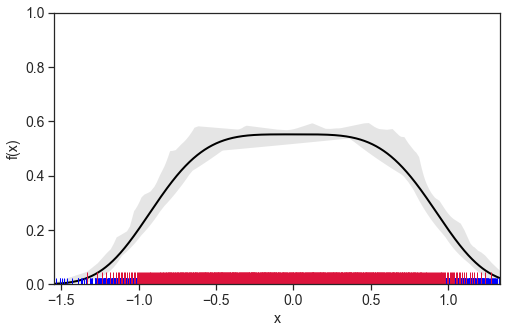

In [148]:
plot_band(dist, X, design_pts, hi, lo, opt_pts, ff, my_alpha, False)

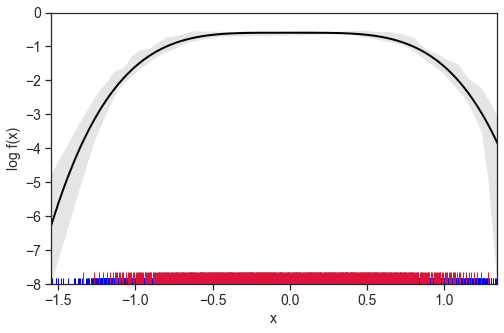

In [149]:
plot_band(dist, X, design_pts, hi, lo, opt_pts, ff, my_alpha, True)

In [86]:
# All done.